In [1]:
# Here I am creating a machine learning model and a webapp to predict that given news is fake or real.(Major Project)

In [2]:
import pandas as pd

In [3]:
# Reading a csv file which contain news title, news text and labels.
df =pd.read_csv("/content/news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6319,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6320,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6321,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6322,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


**process the data and do visualizations**

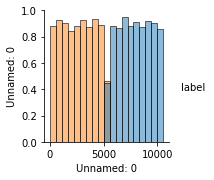

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df, hue="label",diag_kind="hist")

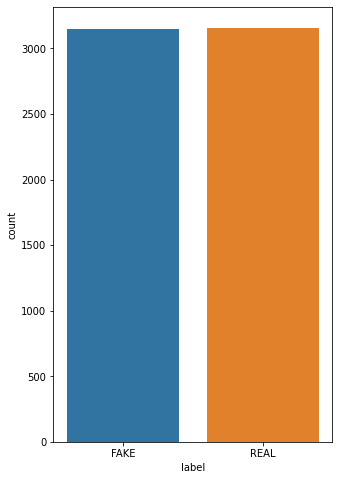

In [5]:
plt.figure(figsize=(5,8))
ax = sns.countplot(x="label",data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6324 non-null   int64 
 1   title       6324 non-null   object
 2   text        6324 non-null   object
 3   label       6310 non-null   object
dtypes: int64(1), object(3)
memory usage: 197.8+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [8]:
#Droping a column which we didn't want in out project.
df.drop("Unnamed: 0",inplace = True,axis = 1)

In [9]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6319,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6320,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6321,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6322,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6324 non-null   object
 1   text    6324 non-null   object
 2   label   6310 non-null   object
dtypes: object(3)
memory usage: 148.3+ KB


In [11]:
# Here I am checking that there is any null value in our dataset or not. 
# If there is any null value then it gives True otherwise it gives False.
df.isnull() 

,title,text,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6319,False,False,False
6320,False,False,False
6321,False,False,False
6322,False,False,False


In [12]:
# Here I am counting null values in each column of our dataset.
df.isnull().sum()

title     0
text      0
label    14
dtype: int64

In [13]:
# Here I am droping the columns which has a NULL values.
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6310 entries, 0 to 6323
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6310 non-null   object
 1   text    6310 non-null   object
 2   label   6310 non-null   object
dtypes: object(3)
memory usage: 197.2+ KB


In [15]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [16]:
# Here in our dataset input is text column which is a text data. So for text data it should be in 1 dimensional.
x = df['text'].values
x

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [17]:
# Here in our dataset output is label column which is also a text data. So for text data it should be in 1 dimensional.
y = df['label'].values
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [18]:
df['text'][5567]

'Thu, 27 Oct 2016 16:35 UTC © UPI.com Successful eurobond sale in September, credit upgrade by Fitch, and sharp improvement in World Bank Ease of Doing Business ranking, all confirm effectiveness of Russian government\'s economic policies, amidst strengthening recovery. As economic recovery in Russia continues to gain hold, Russia has received authoritative endorsement both for its successful macroeconomic policies and for its rapidly improving business conditions. The US credit rating agency Fitch on 14th October 2016 upgraded Russia\'s rating from BBB- (negative) to BBB- (stable). Normally I pay no attention to ratings decisions by US credit rating agencies, which have been proved repeatedly wrong, and which in Russia\'s case are blatantly politicised. Back in 2015, during the worst period of the recession, I pointed out how obviously and completely wrong the decisions of the US credit rating agencies to downgrade Russia\'s credit rating at that time were. The market clearly agrees w

In [19]:
# Here I am counting the diffrent values in output column.
df['label'].value_counts()

REAL    3159
FAKE    3151
Name: label, dtype: int64

In [20]:
# Here I am spliting our input and output data into train and test data set.
# By default it split the dataset into 75:25 ratio.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [21]:
x_train.shape

(4732,)

In [22]:
x_test.shape


(1578,)

In [23]:
# Here I am applying the feature extraction technique using the count vectorizer/bag of words.
# Basic meaning of vectorization is the counting of each word is repeated after splitting. 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer                                                                                                         
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [25]:
# METHOD 1 ( # using svc model)
from sklearn.svm import SVC 
model1 = SVC()

In [26]:
model1.fit(x_train_vect,y_train)  #we need x and y for fitting the model

SVC()

In [27]:
y_pred1 = model1.predict(x_test_vect)
# y_pred1 => is predicted output from model 1.
y_pred1 

array(['FAKE', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [28]:
y_test  #actual value

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [29]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8612167300380228

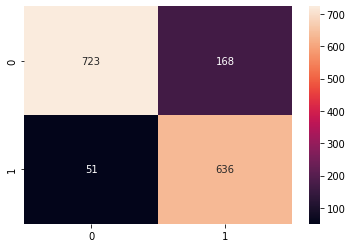

In [30]:
# confusion matrix for model 1
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred1, y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [31]:
# METHOD 2 (using the sklearn pipeline for svc)
# Here is one benifit of using this that we didn't need to do fit and transform individually in pipeline model.
# Beacause it combines two estimators,here two estimaters are svc and CountVectorizer.


In [32]:
# Here fit and transform both are done simultaneously
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)
# y_pred2  => is predicted output from model 2.
y_pred2

array(['FAKE', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [33]:
y_test # actual output.

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [34]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.8510773130544994

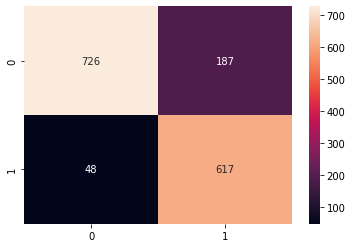

In [35]:
# confusion matrix for model 2
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred2, y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [36]:
# METHOD 3 Using Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [37]:
# Here I am applying the feature extraction technique using the count vectorizer/bag of words.
# Basic meaning of vectorization is the counting of each word is repeated after splitting. 
from sklearn.feature_extraction.text import CountVectorizer                                                                                                         
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [38]:
#Fitting our model.
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [39]:
y_pred3 = model3.predict(x_test_vect)

# y_pred3  => is predicted output from model 3.
y_pred3

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [40]:
y_test

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [41]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.8814955640050697

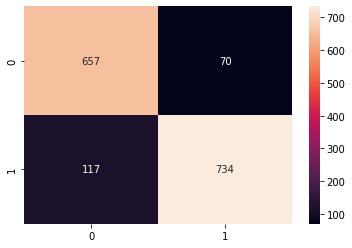

In [42]:
# confusion matrix for model 3
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred3, y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [43]:
from sklearn.pipeline import make_pipeline  
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
# y_pred4  => is predicted output from model 4.
y_pred4

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [44]:
y_test

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [45]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.8770595690747782

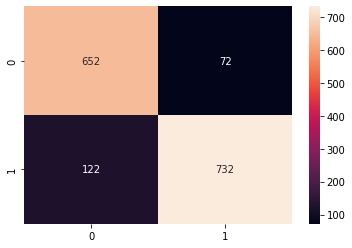

In [46]:
# confusion matrix for model 4
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred4, y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [47]:
# Accuracies ofm all the models
# 1) SVM model                                =>0.8612167300380228
# 2) SVM with pipeline                        =>0.8510773130544994
# 3) MultinomialNB(naive bayes)               =>0.8814955640050697
# 4) MultinomialNB(naive bayes) with pipeline =>0.8770595690747782
# Here we use model which has highest accuracy.

In [48]:
#serialization
import joblib 
joblib.dump(model2,'real-fake') # a file is created 

['real-fake']

In [49]:
#desrialization
import joblib 
text_model = joblib.load('real-fake')

In [50]:

text_model.predict(["free tickets sold"])


array(['FAKE'], dtype=object)

In [51]:
pip install streamlit --quiet

In [52]:
import streamlit as st

In [53]:
%%writefile app.py 
import streamlit as st 
import joblib 
from sklearn.metrics import accuracy_score


st.title("NEWS PREDICTION (REAL OR FAKE)")   #title for the webapp


st.write('Used model is MultinomialNB with pipeline, accuracy:0.8770595690747782')

text_model = joblib.load('/content/real-fake') #loading the joblib model to use for predicting the output 

ip = st.text_input("Enter the news:")         #Input message 
op = text_model.predict([ip])                 # use the model for predicting the output
if st.button('PREDICT'):                      # create a button called as predict, and if that button is clicked, then display the output 
  st.title(op[0])  #print the output 

Writing app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501

2022-06-13 17:03:08.596 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.147.215:8501

npx: installed 22 in 3.951s
your url is: https://eighty-knives-move-35-236-147-215.loca.lt
